In [2]:
# Importing useful libraries that will be needed for this analysis

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
import IPython
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import linear_model

%matplotlib inline

In [115]:
!pip install optuna

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure

In [301]:
dff = pd.read_csv("Life Expectancy Data.csv")
dff

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
dx = pd.read_csv("X_train.csv")
dx.head()

,country,year,status,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,UnitedKingdomofGreatBritainandNorthernIreland,2009,Developed,78.0,4,10.79,0.000000,81.0,1212,63.1,...,93.0,9.81,93.0,0.1,7483.158469,12753375.0,0.8,0.5,0.628,12.0
1,TheformerYugoslavrepublicofMacedonia,2015,Developing,12.0,0,4.60,0.000000,92.0,1,6.3,...,92.0,5.94,91.0,0.1,7483.158469,12753375.0,2.1,2.1,0.746,12.9
2,RepublicofKorea,2012,Developing,69.0,1,9.56,0.000000,99.0,2,3.4,...,99.0,7.10,99.0,0.1,7483.158469,12753375.0,1.5,1.0,0.628,12.0
3,DemocraticPeople'sRepublicofKorea,2011,Developing,153.0,8,3.39,0.000000,94.0,0,3.8,...,99.0,5.94,94.0,0.1,7483.158469,12753375.0,5.1,5.2,0.628,12.0
4,Peru,2005,Developing,148.0,13,4.44,411.564565,94.0,0,48.8,...,66.0,4.72,77.0,0.4,2754.782900,276141.0,1.3,1.3,0.692,13.0


In [6]:
dy = pd.read_csv("y_train.csv")
dy.head()

,life_expectancy
0,81.0
1,75.7
2,81.2
3,69.4
4,72.8


In [375]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 1000, tol = 0.1)
dxx = dx.drop(["country", "status"], axis = 1)
ridge_reg.fit( dxx, dy)

C:\Users\THU HIEN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07649e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=50, max_iter=1000, tol=0.1)

In [376]:
ridge_reg.score(dxx, dy)

0.8156967030438289

In [377]:
x_test = pd.read_csv("X_test.csv")
X_test = x_test.drop(["country", "status"], axis = 1)

In [378]:
y_test = pd.read_csv("y_test.csv")

In [379]:
y_pred = ridge_reg.predict(X_test)
y_pred

array([[76.56197611],
       [76.10035097],
       [77.09607349],
       [70.15929801],
       [81.07569394],
       [72.53102287],
       [73.53680652],
       [72.58318443],
       [76.93162612],
       [74.88702493],
       [74.52914081],
       [56.94221937],
       [72.02023423],
       [69.26072818],
       [75.41268982],
       [73.2562546 ],
       [51.42114203],
       [61.12391642],
       [61.37714264],
       [63.02207211],
       [67.36784388],
       [43.37012814],
       [73.22087091],
       [70.5168261 ],
       [55.59816698],
       [58.09874042],
       [76.2674615 ],
       [60.06403533],
       [74.32800871],
       [71.9028729 ],
       [72.62755841],
       [77.15707478],
       [70.67612464],
       [77.02284635],
       [71.56471218],
       [67.42017023],
       [76.65964613],
       [74.76374305],
       [67.5431697 ],
       [76.44961892],
       [77.84567771],
       [77.05650592],
       [76.43256088],
       [61.58496965],
       [77.30888091],
       [68

In [380]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8102071028322755

Text(0, 0.5, 'predicted')

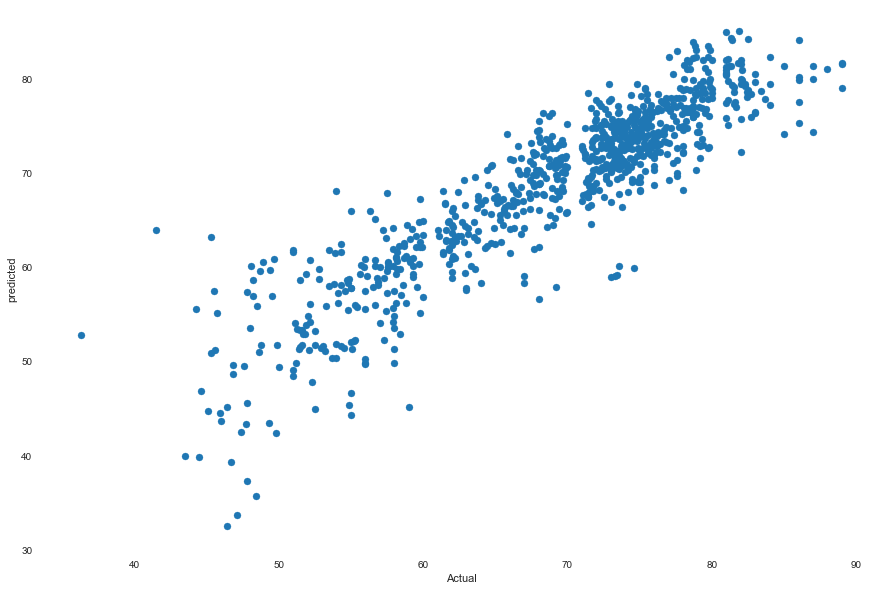

In [381]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

In [382]:
import pandas as pd
from seaborn import heatmap

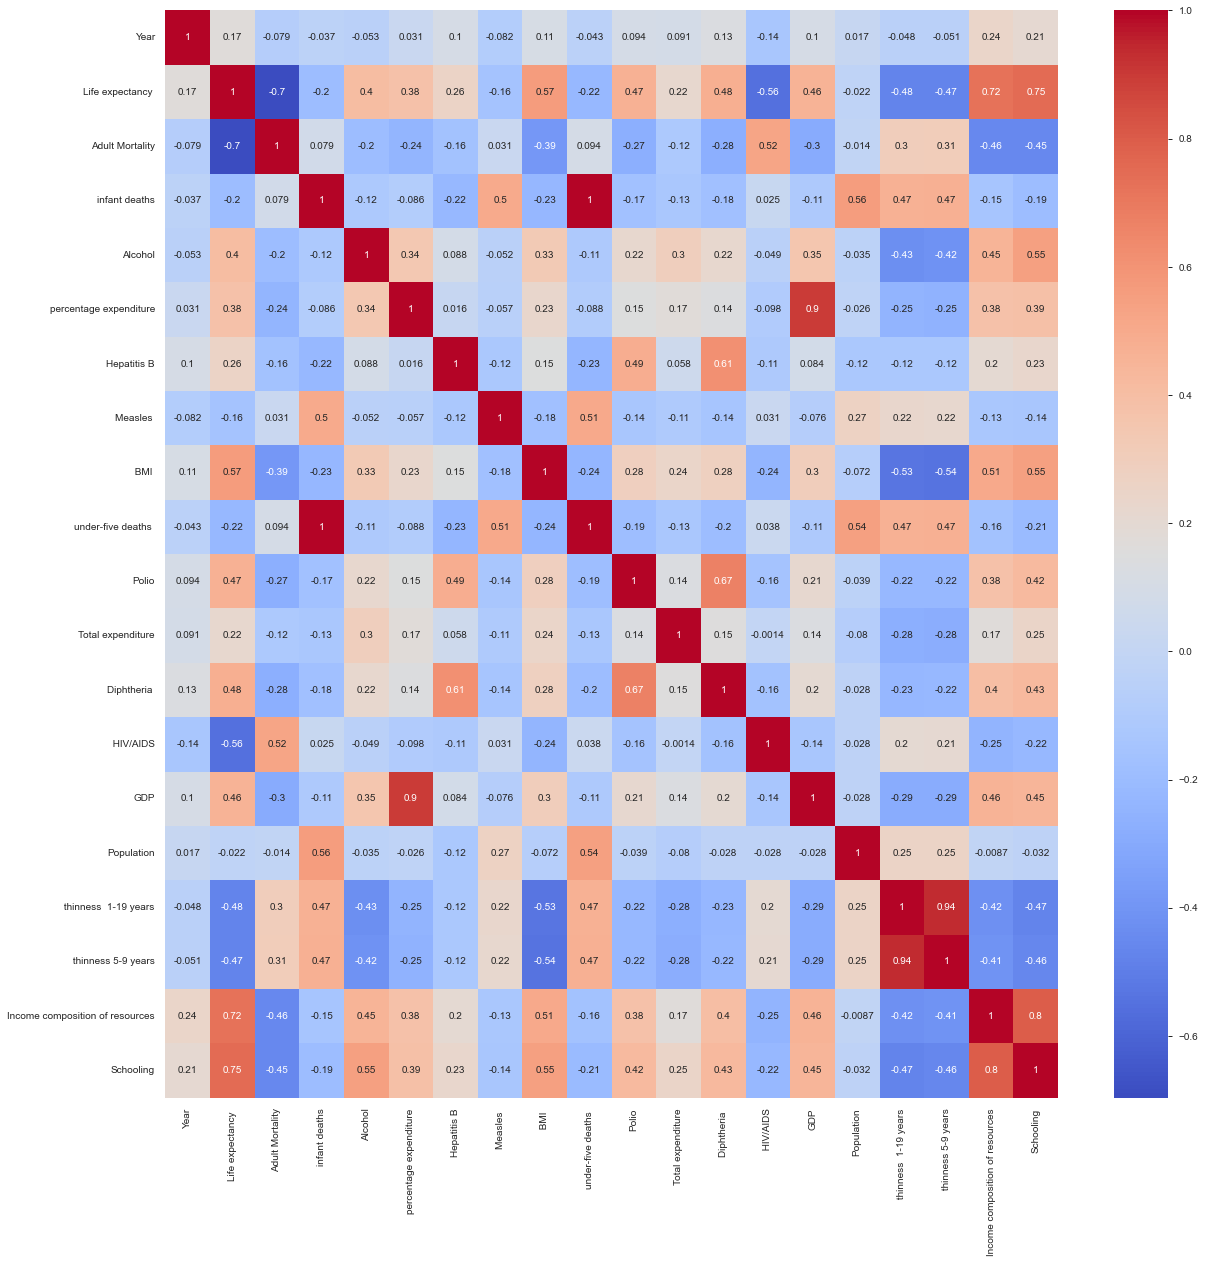

In [383]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(dff.corr(), annot=True, cmap='coolwarm')

In [384]:
n = len(y_test)
mse = y_test - y_pred
mse = mse ** 2
mse = np.sum(mse)
mse = mse / n
print('Mean Squared Error :', mse)

Mean Squared Error : life_expectancy    17.526109
dtype: float64


# Eliminate some columns

In [385]:
X_test.head()

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
0,2009,12.0,0,13.23,0.000000,99.0,5,63.1,0,99.0,7.85,99.0,0.1,7483.158469,12753375.0,1.9,2.0,0.628,12.0
1,2000,13.0,2,6.24,74.148429,81.0,0,54.0,3,91.0,6.40,91.0,0.1,511.368479,15262754.0,1.1,1.1,0.755,13.5
2,2007,176.0,1,12.55,163.343328,81.0,0,59.9,1,99.0,7.51,99.0,0.1,13842.654900,15578.0,1.9,1.9,0.809,15.3
3,2002,167.0,1,3.76,211.114332,81.0,0,43.5,1,99.0,4.86,99.0,2.3,3596.496282,2695446.0,2.0,1.8,0.690,11.7
4,2003,95.0,0,11.28,507.306164,64.0,44,59.4,1,96.0,9.30,95.0,0.1,3743.956930,1376133.0,0.8,0.8,0.878,18.6


In [386]:
X_test2 = X_test.drop(['thinness_1_19_years'], axis = 1)
ridge_reg2 = Ridge(alpha = 50, max_iter = 1000, tol = 0.1)
dx3 = dxx.drop(['thinness_1_19_years'], axis = 1)
ridge_reg2.fit( dx3, dy)

C:\Users\THU HIEN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.07706e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=50, max_iter=1000, tol=0.1)

In [387]:
y_pred2 = ridge_reg2.predict(X_test2)

In [388]:
ridge_reg2.score(dx3, dy)


0.8154220923808836

In [389]:
r2_score(y_test, y_pred2)

0.8102239558485629

# Outlier detecting

In [180]:
df = pd.concat([dy, y_test])
df

,life_expectancy
0,81.0
1,75.7
2,81.2
3,69.4
4,72.8
...,...
877,62.4
878,73.8
879,79.4
880,82.5


In [192]:
df.life_expectancy.describe()

count    2938.000000
mean       69.224847
std         9.507640
min        36.300000
25%        63.200000
50%        72.000000
75%        75.600000
max        89.000000
Name: life_expectancy, dtype: float64

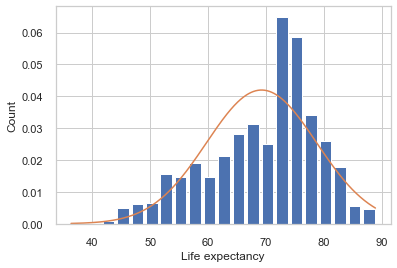

In [441]:
from scipy.stats import norm
plt.hist(dy, bins = 20, rwidth = 0.8, density = True)
plt.xlabel("Life expectancy")
plt.ylabel("Count")

rng = np.arange(df.life_expectancy.min(),df.life_expectancy.max(), 0.1)
plt.plot(rng, norm.pdf(rng, df.life_expectancy.mean(),df.life_expectancy.std()))

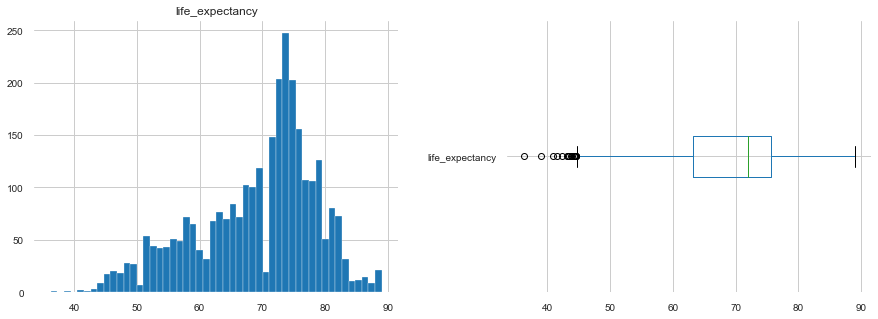

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df[["life_expectancy"]].hist(bins=50, ax=axes[0]);
df[["life_expectancy"]].boxplot(ax=axes[1], vert=False);

In [320]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin


def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper

class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)


In [321]:
def outlier_eliminate(X_train, X_test, y_train, y_test, lower, upper):
    train = pd.concat([X_train, y_train], axis=1)
    test = pd.concat([X_test, y_test], axis=1)
    train_no_outlier = train[(train.life_expectancy > lower)&(train.life_expectancy < upper)]
    test_no_outlier = test[(test.life_expectancy > lower)&(test.life_expectancy < upper)]
    
    X_train_no_outlier = train_no_outlier.drop(["life_expectancy"], axis = 1)
    y_train_no_outlier = train_no_outlier["life_expectancy"]
    X_test_no_outlier  = test_no_outlier.drop(["life_expectancy"], axis = 1)
    y_test_no_outlier = test_no_outlier["life_expectancy"]
    
    return X_train_no_outlier, y_train_no_outlier, X_test_no_outlier, y_test_no_outlier
    
    

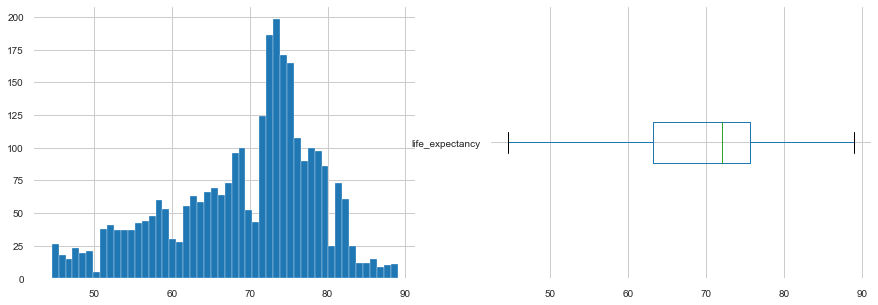

In [322]:
df_no_outlier = BoxplotOutlierClipper().fit_transform(df["life_expectancy"])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
df_no_outlier.hist(bins=50, ax=axes[0])
df_no_outlier.to_frame().boxplot(ax=axes[1], vert=False);

In [323]:
lower, upper = find_boxplot_boundaries(df["life_expectancy"], 1.5)
lower, upper

(44.600000000000016, 94.19999999999999)

In [324]:
X_train_no_outlier, y_train_no_outlier, X_test_no_outlier, y_test_no_outlier = outlier_eliminate(dx3, X_test2, dy, y_test, lower, upper)

In [326]:
y_pred3 = ridge_reg2.predict(X_test_no_outlier)

In [327]:
ridge_reg2.score(X_train_no_outlier, y_train_no_outlier)

0.816444377325851

In [328]:
r2_score(y_test_no_outlier, y_pred3)

0.8156092720598214

# Hyperparameter Tuning

In [225]:
import optuna
import sklearn.model_selection

In [390]:


# 1. Define an objective function to be maximized.
def objective(trial):
    x = pd.concat([X_train_no_outlier, X_test_no_outlier])
    y = pd.concat([y_train_no_outlier,  y_test_no_outlier])

    # 2. Suggest values for the hyperparameters using a trial object.

    r_alpha = trial.suggest_float('r_alpha', 1, 100, log=True)
    r_max_iter =  trial.suggest_int('r_max_iter', 1000, 1000000, log=True)
    Ridge_obj = Ridge(alpha=r_alpha, max_iter=r_max_iter, tol = 0.01)
    
    score = sklearn.model_selection.cross_val_score(Ridge_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy



In [391]:
# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
study.best_trial

[I 2022-05-03 13:29:30,566] A new study created in memory with name: no-name-6dd1d753-4a4c-4e53-8848-f49d67be5a68
[I 2022-05-03 13:29:33,257] Trial 0 finished with value: 0.810727377644548 and parameters: {'r_alpha': 55.72363099660616, 'r_max_iter': 94166}. Best is trial 0 with value: 0.810727377644548.
[I 2022-05-03 13:29:34,153] Trial 1 finished with value: 0.8132798845713022 and parameters: {'r_alpha': 5.424517567416762, 'r_max_iter': 5040}. Best is trial 1 with value: 0.8132798845713022.
[I 2022-05-03 13:29:35,075] Trial 2 finished with value: 0.8116387015559828 and parameters: {'r_alpha': 32.724900078563465, 'r_max_iter': 501498}. Best is trial 1 with value: 0.8132798845713022.
[I 2022-05-03 13:29:35,128] Trial 3 finished with value: 0.8134323104812906 and parameters: {'r_alpha': 1.3417004391215515, 'r_max_iter': 52516}. Best is trial 3 with value: 0.8134323104812906.
[I 2022-05-03 13:29:35,170] Trial 4 finished with value: 0.8133257026567088 and parameters: {'r_alpha': 4.49685860

[I 2022-05-03 13:29:36,219] Trial 39 finished with value: 0.8134108545146846 and parameters: {'r_alpha': 2.2745789792653928, 'r_max_iter': 9275}. Best is trial 26 with value: 0.8134374054507506.
[I 2022-05-03 13:29:36,251] Trial 40 finished with value: 0.8098032338794426 and parameters: {'r_alpha': 96.71581333200848, 'r_max_iter': 2637}. Best is trial 26 with value: 0.8134374054507506.
[I 2022-05-03 13:29:36,270] Trial 41 finished with value: 0.8134317344853791 and parameters: {'r_alpha': 1.3746350647311079, 'r_max_iter': 10830}. Best is trial 26 with value: 0.8134374054507506.
[I 2022-05-03 13:29:36,303] Trial 42 finished with value: 0.8134364995000363 and parameters: {'r_alpha': 1.0705411383994443, 'r_max_iter': 17299}. Best is trial 26 with value: 0.8134374054507506.
[I 2022-05-03 13:29:36,336] Trial 43 finished with value: 0.8134239997256065 and parameters: {'r_alpha': 1.7586287873041566, 'r_max_iter': 4187}. Best is trial 26 with value: 0.8134374054507506.
[I 2022-05-03 13:29:36,3

[I 2022-05-03 13:29:37,758] Trial 79 finished with value: 0.8134313998429281 and parameters: {'r_alpha': 1.3934062191372252, 'r_max_iter': 779814}. Best is trial 66 with value: 0.8134374092737741.
[I 2022-05-03 13:29:37,789] Trial 80 finished with value: 0.8131352238670239 and parameters: {'r_alpha': 7.962833587362177, 'r_max_iter': 558508}. Best is trial 66 with value: 0.8134374092737741.
[I 2022-05-03 13:29:37,813] Trial 81 finished with value: 0.8123531900175677 and parameters: {'r_alpha': 19.999900647407387, 'r_max_iter': 357211}. Best is trial 66 with value: 0.8134374092737741.
[I 2022-05-03 13:29:37,841] Trial 82 finished with value: 0.8134374084667712 and parameters: {'r_alpha': 1.0011375193364216, 'r_max_iter': 14604}. Best is trial 66 with value: 0.8134374092737741.
[I 2022-05-03 13:29:37,873] Trial 83 finished with value: 0.8134354453775833 and parameters: {'r_alpha': 1.145264130244961, 'r_max_iter': 12690}. Best is trial 66 with value: 0.8134374092737741.
[I 2022-05-03 13:29

FrozenTrial(number=66, values=[0.8134374092737741], datetime_start=datetime.datetime(2022, 5, 3, 13, 29, 37, 222707), datetime_complete=datetime.datetime(2022, 5, 3, 13, 29, 37, 255010), params={'r_alpha': 1.0010734942382078, 'r_max_iter': 421977}, distributions={'r_alpha': LogUniformDistribution(high=100.0, low=1.0), 'r_max_iter': IntLogUniformDistribution(high=1000000, low=1000, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=66, state=TrialState.COMPLETE, value=None)

In [392]:
ridge_reg3 = Ridge(alpha =1.0010734942382078, max_iter =  421977, tol = 0.01)
ridge_reg3.fit(X_train_no_outlier , y_train_no_outlier)

C:\Users\THU HIEN\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.95121e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=1.0010734942382078, max_iter=421977, tol=0.01)

In [393]:
ridge_reg3.score(X_train_no_outlier, y_train_no_outlier)

0.8166713482266807

In [394]:
r2_score(y_test_no_outlier, y_pred3)

0.8156092720598214

# Principal Component Analysis (PCA) 

In [412]:
feature_not_required = []

In [425]:
X_train_no_outlier.adult_mortality = X_train_no_outlier.apply(lambda x: np.nan if (x.adult_mortality < 35 or x.adult_mortality > 600) else x.adult_mortality, axis=1)
X_train_no_outlier.infant_deaths = X_train_no_outlier.apply(lambda x: np.nan if (x.infant_deaths < 2 or x.infant_deaths > 900) else x.infant_deaths, axis=1)
X_train_no_outlier.bmi = X_train_no_outlier.apply(lambda x: np.nan if (x.bmi < 18 or x.bmi > 33) else x.bmi, axis=1)
X_train_no_outlier.under_five_deaths = X_train_no_outlier.apply(lambda x: np.nan if (x.under_five_deaths < 3 or x.under_five_deaths > 800) else x.under_five_deaths, axis=1)

In [426]:
X_test_no_outlier.adult_mortality = X_test_no_outlier.apply(lambda x: np.nan if (x.adult_mortality < 35 or x.adult_mortality > 600) else x.adult_mortality, axis=1)
X_test_no_outlier.infant_deaths = X_test_no_outlier.apply(lambda x: np.nan if (x.infant_deaths < 2 or x.infant_deaths > 900) else x.infant_deaths, axis=1)
X_test_no_outlier.bmi = X_test_no_outlier.apply(lambda x: np.nan if (x.bmi < 18 or x.bmi > 33) else x.bmi, axis=1)
X_test_no_outlier.under_five_deaths = X_test_no_outlier.apply(lambda x: np.nan if (x.under_five_deaths < 3 or x.under_five_deaths > 800) else x.under_five_deaths, axis=1)

C:\Users\THU HIEN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


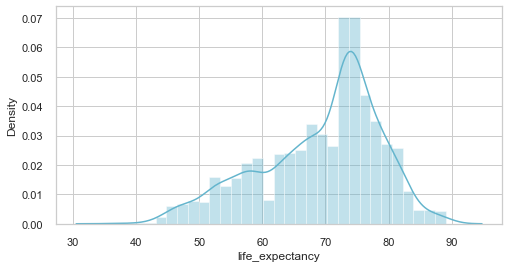

In [427]:
sns.set(style='whitegrid')
f,ax = plt.subplots(1,1,figsize = (8,4))
ax = sns.distplot(df['life_expectancy'], kde = True, color = 'c')

In [428]:
feature_not_required.append('infant_deaths')
feature_not_required.append('alcohol')
feature_not_required.append('percentage_expenditure')
feature_not_required.append('hepatitis_b')
feature_not_required.append('polio')
feature_not_required.append('total_expenditure')
feature_not_required.append('diphtheria')
feature_not_required.append('gdp')
feature_not_required.append('population')
feature_not_required.append('thinness_5_9_years')
feature_not_required.append('bmi')

In [429]:
feature_not_required

['infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'polio',
 'total_expenditure',
 'diphtheria',
 'gdp',
 'population',
 'thinness_5_9_years',
 'bmi',
 'infant_deaths',
 'alcohol',
 'percentage_expenditure',
 'hepatitis_b',
 'polio',
 'total_expenditure',
 'diphtheria',
 'gdp',
 'population',
 'thinness_5_9_years',
 'bmi']

In [430]:
X_train_final = X_train_no_outlier.drop(feature_not_required,axis=1)
X_test_final = X_test_no_outlier.drop(feature_not_required,axis=1)
X = pd.concat([X_train_final ,X_test_final ], axis = 1)

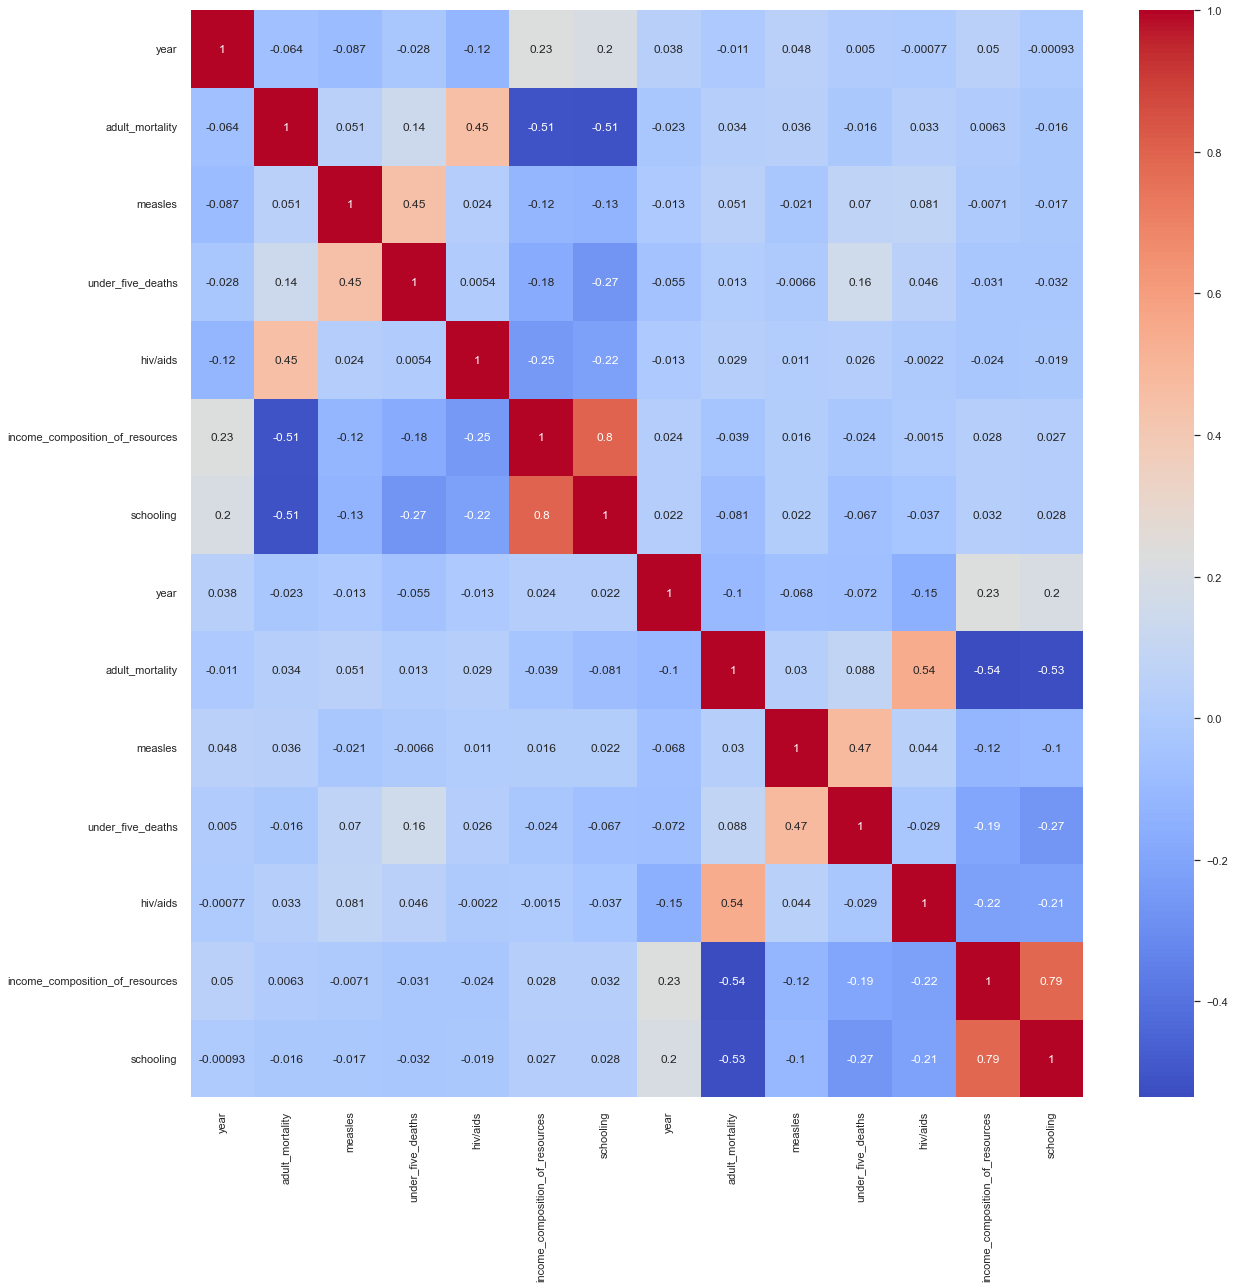

In [431]:
f, ax = plt.subplots(1, 1, figsize=(20, 20))
ax = sns.heatmap(X.corr(), annot=True, cmap='coolwarm')

In [437]:
X_train_final.drop(['under_five_deaths'],axis=1)
X_test_final.drop(['under_five_deaths'],axis=1)

,year,adult_mortality,measles,hiv/aids,income_composition_of_resources,schooling
0,2009,182.83776,5,0.1,0.628,12.0
1,2000,182.83776,0,0.1,0.755,13.5
2,2007,176.00000,0,0.1,0.809,15.3
3,2002,167.00000,0,2.3,0.690,11.7
4,2003,95.00000,44,0.1,0.878,18.6
...,...,...,...,...,...,...
877,2013,281.00000,12,0.8,0.506,10.0
878,2006,182.83776,0,0.1,0.751,13.2
879,2006,79.00000,28,0.1,0.628,12.0
880,2012,59.00000,42,0.1,0.917,15.4


In [438]:
X_train_final.fillna(X.mean(), inplace=True)
X_test_final.fillna(X.mean(), inplace=True)

In [439]:
ridge_reg4 = Ridge(alpha =1.0010734942382078, max_iter =  421977, tol = 0.01)
ridge_reg4.fit(X_train_final , y_train_no_outlier)

Ridge(alpha=1.0010734942382078, max_iter=421977, tol=0.01)

In [440]:
ridge_reg4.score(X_train_final, y_train_no_outlier)

0.7913884643225665